In [2]:
# install Kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliezyang","key":"4c621d516b370d48c1c96a71672462a9"}'}

# New Section

In [4]:
# create a kaggle folder
! mkdir ~/.kaggle

In [5]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [6]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                 title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                  Data Science Job Salaries               7KB  2022-06-15 08:59:12          17867        557  1.0              
nancyalaswad90/diamonds-prices                      Diamonds Prices                       711KB  2022-07-09 14:59:21           1983         90  1.0              
aravindas01/monkeypox-cases-countrywise-data        MonkeyPox Cases_Countrywise Data        6KB  2022-08-10 17:12:36            543         30  0.9117647        
faryarmemon/usa-housing-market-factors              U.S. Housing Market Factors            32KB  2022-08-03 02:19:31            436         31  1.0              
zzettrkalpakbal/full-filled-

In [8]:
# RSNA 2022 Cervical Spine Fracture Detection
# !kaggle competitions download -c rsna-2022-cervical-spine-fracture-detection

In [9]:
# Medical MNIST
!kaggle datasets download -d andrewmvd/medical-mnist

 94% 80.0M/84.8M [00:00<00:00, 120MB/s]
100% 84.8M/84.8M [00:01<00:00, 77.8MB/s]


In [10]:
# unzip to MdicalM folder
!unzip -u  medical-mnist.zip -d "/content/Medical_T"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Medical_T/HeadCT/005000.jpeg  
  inflating: /content/Medical_T/HeadCT/005001.jpeg  
  inflating: /content/Medical_T/HeadCT/005002.jpeg  
  inflating: /content/Medical_T/HeadCT/005003.jpeg  
  inflating: /content/Medical_T/HeadCT/005004.jpeg  
  inflating: /content/Medical_T/HeadCT/005005.jpeg  
  inflating: /content/Medical_T/HeadCT/005006.jpeg  
  inflating: /content/Medical_T/HeadCT/005007.jpeg  
  inflating: /content/Medical_T/HeadCT/005008.jpeg  
  inflating: /content/Medical_T/HeadCT/005009.jpeg  
  inflating: /content/Medical_T/HeadCT/005010.jpeg  
  inflating: /content/Medical_T/HeadCT/005011.jpeg  
  inflating: /content/Medical_T/HeadCT/005012.jpeg  
  inflating: /content/Medical_T/HeadCT/005013.jpeg  
  inflating: /content/Medical_T/HeadCT/005014.jpeg  
  inflating: /content/Medical_T/HeadCT/005015.jpeg  
  inflating: /content/Medical_T/HeadCT/005016.jpeg  
  inflating: /content/Medical_T/HeadCT/005017.jp

In [1]:
import os
import pathlib
import random
import gc
import zipfile

from PIL import Image
import albumentations as A

import numpy as np
import math
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical


random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [12]:
# Check the classes and prepare the lists of files and labels

In [13]:
PATH = '/content/Medical_T/'

p = pathlib.Path(PATH)

labels = [x.parts[-1] for x in p.iterdir()]
num_classes = len(labels)

labels.sort()
labels

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [14]:
files_paths = []
files_labels = []

for root, dirs, files in os.walk(PATH):
  p = pathlib.Path(root)

  for file in files:
    files_paths.append(root + '/' + file)
    files_labels.append(p.parts[-1])

In [15]:
len(files_labels), len(files_paths)

(58954, 58954)

In [16]:
labels_cnt = []

for label in labels:
  print(label, files_labels.count(label))
  labels_cnt.append(files_labels.count(label))

AbdomenCT 10000
BreastMRI 8954
CXR 10000
ChestCT 10000
Hand 10000
HeadCT 10000


In [17]:
# Prepare X and y

In [18]:
def prepare_X_y(files_paths, width=64, height=64):
  X = []

  for path in files_paths:
    img = Image.open(path)
    img.load()

    if (width or height) != 64:
      img = img.resize((width,height))

    img_X = np.asarray(img, dtype=np.int16)
    X.append(img_X)

  X = np.asarray(X)
  y = np.asarray(files_labels)

  return X, y

In [19]:
X, y = prepare_X_y(files_paths)

In [20]:
X.shape, y.shape

((58954, 64, 64), (58954,))

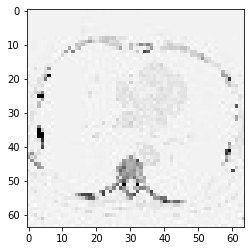

In [21]:
plt.imshow(X[12345],cmap='gray_r');

In [22]:
y[12345]

'ChestCT'

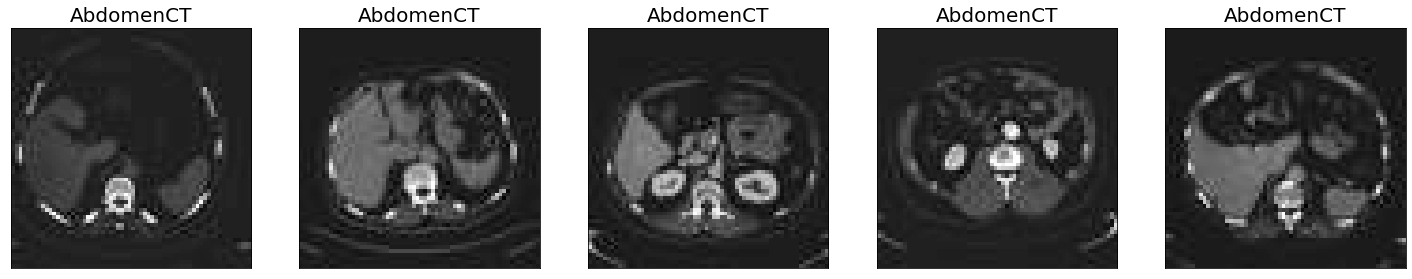

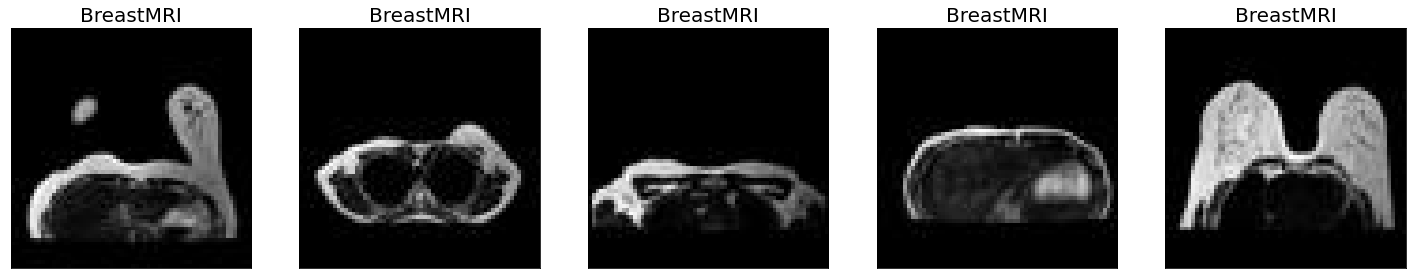

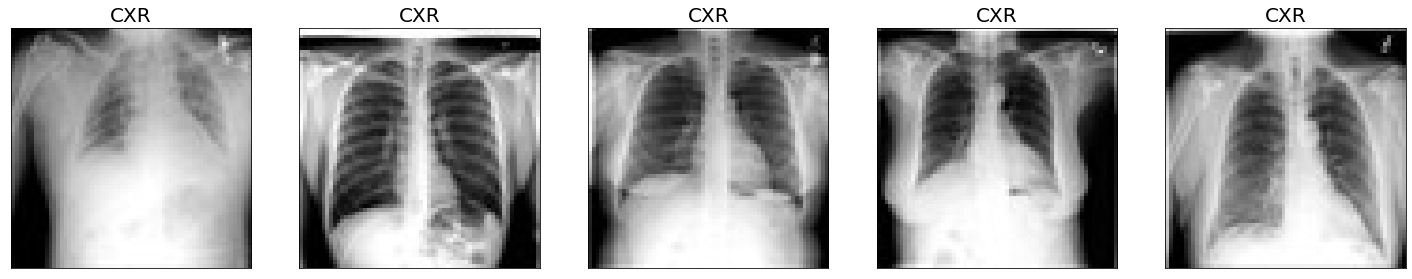

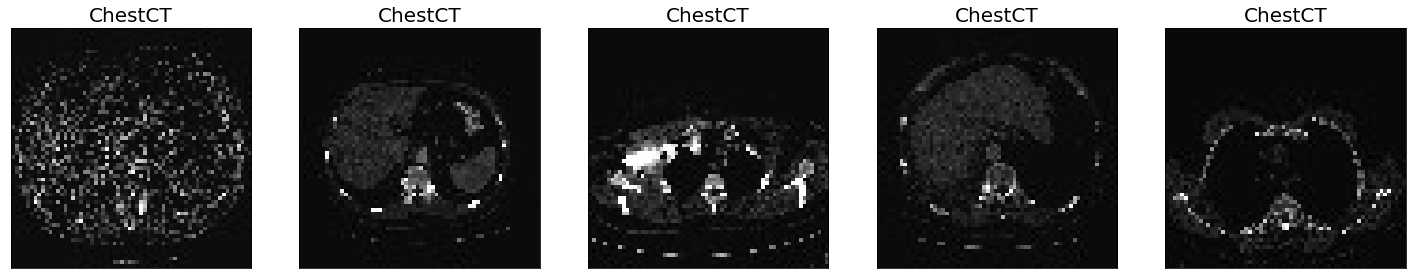

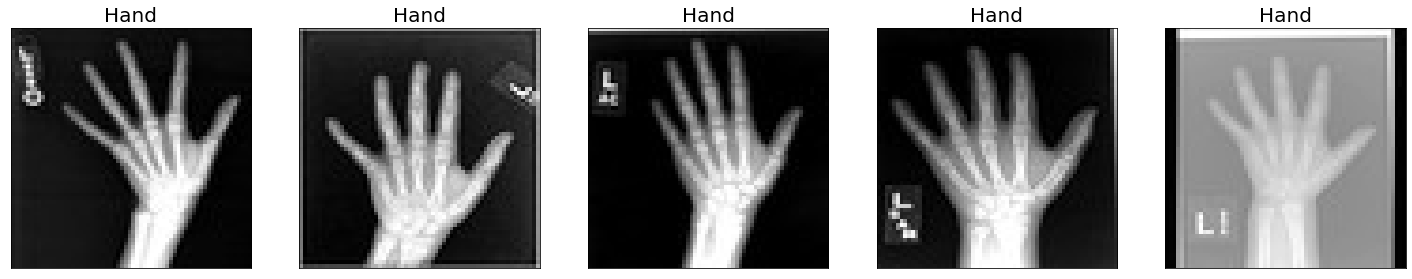

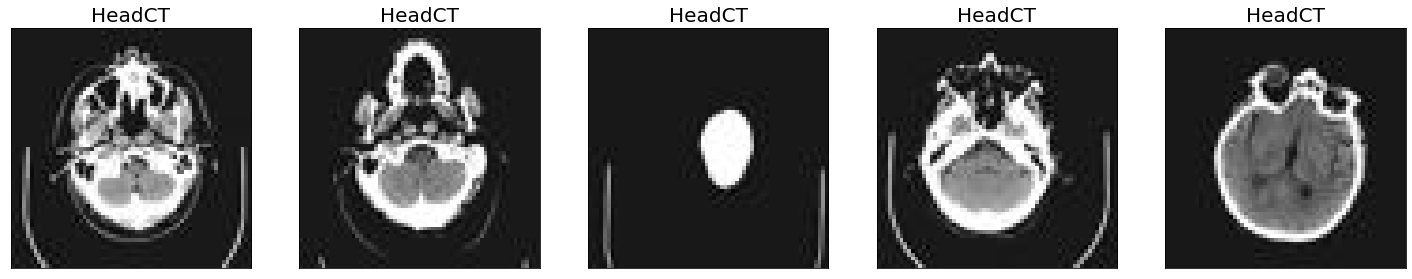

In [23]:
# viewing the data in each catogary 
for label in labels:
    images = X[y == label] 
    
    plt.figure(figsize=(25,35))
    for i in range(5):
        plt.subplot(6, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(label, fontsize=20)
        plt.xticks([])
        plt.yticks([])

# y as string


In [24]:
type(y)

numpy.ndarray

In [25]:
y[49999:50100]

array(['CXR', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI',
       'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI', 'BreastMRI'

In [26]:
# convert y to int
y_l= pd.factorize(y)[0]

In [27]:
type(y_l)

numpy.ndarray

In [28]:
y_l[49999:50100]

array([4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

*   AbdomenCT 10000	0
*   ChestCT 10000		1
*   HeadCT 10000		2
*   Hand 10000			3
*   CXR 10000.    		4
*   BreastMRI 8954		5










In [29]:
# test, valid and test dataset split

In [30]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_l, test_size=0.2, random_state=1, stratify=y)

In [31]:
X_train_full.shape

(47163, 64, 64)

In [32]:
y_train_full.shape

(47163,)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [34]:
X_train.shape

(35372, 64, 64)

In [35]:
y_train.shape

(35372,)

In [36]:
y_train[1]

5

In [37]:
# graph
labels_cnt_train = []
labels_cnt_val=[]
labels_cnt_test = []
kinds=[0,1,2,3,4,5]

for kind in kinds:
  labels_cnt_train.append(np.count_nonzero(y_train == kind))
  labels_cnt_val.append(np.count_nonzero(y_val == kind))
  labels_cnt_test.append(np.count_nonzero(y_test == kind))

In [38]:
labels_cnt_train,labels_cnt_val, labels_cnt_test

([5970, 5946, 6035, 6003, 6042, 5376],
 [2030, 2054, 1965, 1997, 1958, 1787],
 [2000, 2000, 2000, 2000, 2000, 1791])

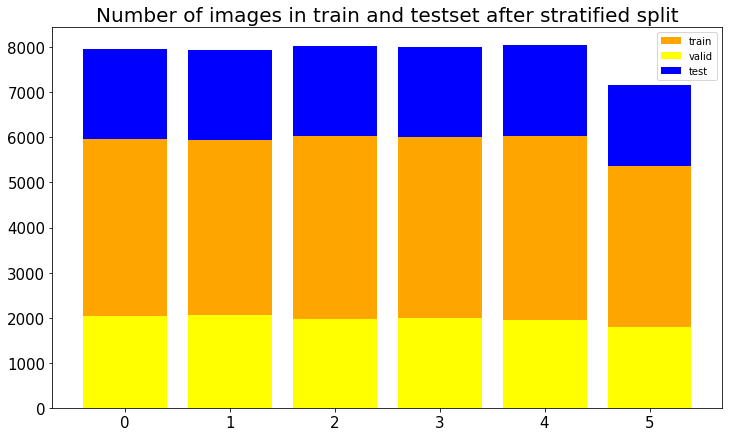

In [39]:
plt.figure(figsize=(12,7))
plt.bar(kinds, labels_cnt_train, label='train', color='orange')
plt.bar(kinds, labels_cnt_val, label='valid', color='yellow')
plt.bar(kinds, labels_cnt_test, bottom=labels_cnt_train, label='test', color='blue')
plt.title('Number of images in train and testset after stratified split', fontsize=20)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
# AbdomenCT 10000	  0
# ChestCT 10000		  1
# HeadCT 10000		  2
# Hand 10000			  3
# CXR 10000.    		4
# BreastMRI 8954		5


In [40]:
# Normalization

In [41]:
np.min(X_val)

0

In [42]:
np.max(X_train)

255

In [43]:
X_val = X_val.reshape(-1,64*64)/255
X_train = X_train.reshape(-1,64*64)/255
X_test=X_test.reshape(-1,64*64)/255

In [44]:
np.max(X_train)

1.0

In [45]:
X_train.shape

(35372, 4096)

In [2]:
# model creation 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [67]:
# baseline model
model=Sequential()
model.add(keras.Input(shape=4096))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [68]:
model.compile(
    loss='sparse_categorical_crossentropy', 
   optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               1229100   
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 6)                 606       
                                                                 
Total params: 1,259,806
Trainable params: 1,259,806
Non-trainable params: 0
_________________________________________________________________


In [70]:
%%time
px_score=model.fit(X_train, y_train,epochs=30,batch_size=10000, validation_data=(X_val,y_val))

Epoch 1/30
4/4 [==============================] - 5s 1s/step - loss: 2.3121 - accuracy: 0.4063 - val_loss: 1.7630 - val_accuracy: 0.7039
Epoch 2/30
4/4 [==============================] - 4s 1s/step - loss: 1.1365 - accuracy: 0.7415 - val_loss: 0.6063 - val_accuracy: 0.7545
Epoch 3/30
4/4 [==============================] - 4s 1s/step - loss: 0.5674 - accuracy: 0.7793 - val_loss: 0.4646 - val_accuracy: 0.7868
Epoch 4/30
4/4 [==============================] - 4s 1s/step - loss: 0.4019 - accuracy: 0.7863 - val_loss: 0.3679 - val_accuracy: 0.8071
Epoch 5/30
4/4 [==============================] - 4s 1s/step - loss: 0.3418 - accuracy: 0.8116 - val_loss: 0.3349 - val_accuracy: 0.7890
Epoch 6/30
4/4 [==============================] - 4s 1s/step - loss: 0.3032 - accuracy: 0.8679 - val_loss: 0.2893 - val_accuracy: 0.9366
Epoch 7/30
4/4 [==============================] - 4s 1s/step - loss: 0.2668 - accuracy: 0.9217 - val_loss: 0.2601 - val_accuracy: 0.9260
Epoch 8/30
4/4 [=========================

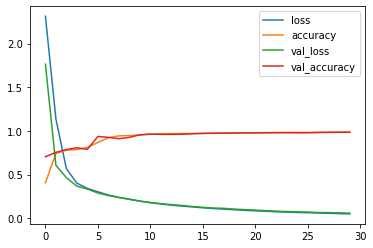

In [71]:
pd.DataFrame(px_score.history).plot()

In [72]:
model.evaluate(X_test,y_test)

369/369 [==============================] - 2s 6ms/step - loss: 0.0560 - accuracy: 0.9858


[0.056040678173303604, 0.9858366847038269]

In [77]:
# improved model - used less neuro in the 1st layer to increase computation speed; 
# higher learning rate; 
# and improve accracy on test set. 
model=Sequential()
model.add(keras.Input(shape=4096))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [78]:
model.compile(
    loss='sparse_categorical_crossentropy', 
   optimizer=keras.optimizers.Adam(lr=0.002),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 150)               614550    
                                                                 
 dense_19 (Dense)            (None, 100)               15100     
                                                                 
 dense_20 (Dense)            (None, 6)                 606       
                                                                 
Total params: 630,256
Trainable params: 630,256
Non-trainable params: 0
_________________________________________________________________


In [80]:
%%time
px_score=model.fit(X_train, y_train,epochs=30,batch_size=10000, validation_data=(X_val,y_val))

Epoch 1/30
4/4 [==============================] - 8s 2s/step - loss: 2.2921 - accuracy: 0.2972 - val_loss: 1.6487 - val_accuracy: 0.6723
Epoch 2/30
4/4 [==============================] - 4s 933ms/step - loss: 1.1993 - accuracy: 0.5876 - val_loss: 0.7638 - val_accuracy: 0.7109
Epoch 3/30
4/4 [==============================] - 3s 781ms/step - loss: 0.6268 - accuracy: 0.7636 - val_loss: 0.4288 - val_accuracy: 0.7909
Epoch 4/30
4/4 [==============================] - 3s 737ms/step - loss: 0.3659 - accuracy: 0.8345 - val_loss: 0.3108 - val_accuracy: 0.8695
Epoch 5/30
4/4 [==============================] - 3s 750ms/step - loss: 0.2819 - accuracy: 0.8924 - val_loss: 0.2708 - val_accuracy: 0.9439
Epoch 6/30
4/4 [==============================] - 3s 734ms/step - loss: 0.2467 - accuracy: 0.9379 - val_loss: 0.2540 - val_accuracy: 0.9260
Epoch 7/30
4/4 [==============================] - 3s 756ms/step - loss: 0.2218 - accuracy: 0.9284 - val_loss: 0.2184 - val_accuracy: 0.9517
Epoch 8/30
4/4 [=======

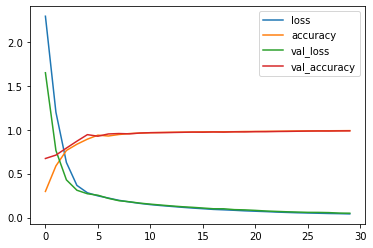

In [81]:
pd.DataFrame(px_score.history).plot()

In [82]:
model.evaluate(X_test,y_test)

369/369 [==============================] - 2s 4ms/step - loss: 0.0426 - accuracy: 0.9881


[0.04262319952249527, 0.9881265163421631]

# try the model on a different dataset


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip gdrive/My\ Drive/WCD-ML/archive.zip -d "/content/lung_cancer"

Archive:  gdrive/My Drive/WCD-ML/archive.zip
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000108 (3).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000109 (2).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000109 (4).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000109 (5).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000112 (2).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000113 (7).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000114 (5).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000114.png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000115 (4).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000115 (8).png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000115.png  
  inflating: /content/lung_cancer/Data/test/adenocarcinoma/000116 (5).png  
  inflating: /content/lung_cancer/Data/test/adenoca

In [52]:
#Define Directories for train, test & Validation Set
train_path = '/content/lung_cancer/Data/train'
test_path = '/content/lung_cancer/Data/test'
valid_path = '/content/lung_cancer/Data/valid'

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set

image_gen = ImageDataGenerator(
                                  rescale = 1./255,                                          
                               )
# Create Image Data Generator for train/val Set
train_ds = image_gen.flow_from_directory(train_path,
                                   target_size=(224, 224),
                                   batch_size=50,
                                   class_mode='categorical'
                                   )
val_ds = image_gen.flow_from_directory(test_path,
                                   target_size=(224, 224),
                                   batch_size=50,
                                   class_mode='categorical'
                                   )

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [75]:
classifier = Sequential()
classifier.add(Conv2D(16, (3, 3), input_shape=(224,224,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(num_classes, activation = 'softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [76]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 128)     18560     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 373248)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                

In [77]:
%%time
px_score=classifier.fit(train_ds,epochs=30,batch_size=50, validation_data=val_ds)

Epoch 1/30
13/13 [==============================] - 44s 3s/step - loss: 6.3584 - acc: 0.3116 - val_loss: 1.3837 - val_acc: 0.1873
Epoch 2/30
13/13 [==============================] - 42s 3s/step - loss: 0.9953 - acc: 0.5693 - val_loss: 1.0138 - val_acc: 0.4921
Epoch 3/30
13/13 [==============================] - 43s 3s/step - loss: 0.5623 - acc: 0.7765 - val_loss: 1.0947 - val_acc: 0.4413
Epoch 4/30
13/13 [==============================] - 43s 3s/step - loss: 0.3323 - acc: 0.8956 - val_loss: 1.4043 - val_acc: 0.4444
Epoch 5/30
13/13 [==============================] - 43s 3s/step - loss: 0.1704 - acc: 0.9576 - val_loss: 1.1542 - val_acc: 0.5429
Epoch 6/30
13/13 [==============================] - 43s 3s/step - loss: 0.0933 - acc: 0.9869 - val_loss: 1.4036 - val_acc: 0.5079
Epoch 7/30
13/13 [==============================] - 43s 3s/step - loss: 0.0537 - acc: 0.9951 - val_loss: 1.9816 - val_acc: 0.5016
Epoch 8/30
13/13 [==============================] - 43s 3s/step - loss: 0.0333 - acc: 0.99

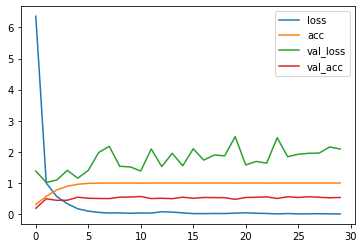

In [78]:
pd.DataFrame(px_score.history).plot()